In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
import pandas as pd
from sklearn.dummy import DummyClassifier

seaborn.set()

In [32]:
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv('/Users/daisyabbott/Desktop/LA-Crime/archive/crime_in_la.csv')
df.head(5)

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534


Trying to predict: Area, or weapon used 

In [33]:
# create feature list and separate into catagorical and numerical features as well as identify a target (this case time)
feature_list = ['Vict Sex',
            'Vict Descent','Weapon Used Cd', 'TIME OCC', 'Crm Cd', 'AREA', 'Vict Age', 'LOCATION']
target = 'AREA'
# Categorical features
cat = ['Vict Sex','Vict Descent', 'TIME OCC', 'LOCATION']
# Numeric features
num = ['Crm Code', 'AREA', 'Weapon Used Cd', 'Vict Age']

In [34]:
# create data frame from feature list
temp = df[feature_list]
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION
0,F,B,400.0,22:30,624,3,36,1100 W 39TH PL
1,M,H,500.0,03:30,624,1,25,700 S HILL ST
2,F,W,500.0,17:30,745,15,76,5400 CORTEEN PL
3,X,X,500.0,04:15,740,19,31,14400 TITUS ST
4,F,H,500.0,00:30,121,1,25,700 S BROADWAY
...,...,...,...,...,...,...,...,...
495405,M,W,500.0,01:00,341,19,37,14000 BALBOA BL
495406,F,H,500.0,12:10,421,19,48,8400 VAN NUYS BL
495407,X,X,500.0,15:30,510,10,0,18800 SHERMAN WY
495408,X,X,500.0,20:00,510,11,0,4000 FOUNTAIN AV


In [35]:
# drop null values
temp = temp.dropna()
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION
0,F,B,400.0,22:30,624,3,36,1100 W 39TH PL
1,M,H,500.0,03:30,624,1,25,700 S HILL ST
2,F,W,500.0,17:30,745,15,76,5400 CORTEEN PL
3,X,X,500.0,04:15,740,19,31,14400 TITUS ST
4,F,H,500.0,00:30,121,1,25,700 S BROADWAY
...,...,...,...,...,...,...,...,...
495405,M,W,500.0,01:00,341,19,37,14000 BALBOA BL
495406,F,H,500.0,12:10,421,19,48,8400 VAN NUYS BL
495407,X,X,500.0,15:30,510,10,0,18800 SHERMAN WY
495408,X,X,500.0,20:00,510,11,0,4000 FOUNTAIN AV


In [71]:
#### DIDN NOT WORK TO RUN, RAN FOREVER:  OneHot encode categorical vars
#temp_encoded = pd.get_dummies(temp, columns=cat, drop_first=True)

# Show first 5 rows of df
#temp_encoded.head(5)


In [72]:
## DIDNT WORK TO RUN, RAN FOREVER
# another attempt at one hot encoding the cat vars
#features = temp[cat]
#features = pd.get_dummies(features)
#features

In [36]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical variable
for col in cat:
    temp[col] = label_encoder.fit_transform(temp[col])

# Display the first few rows of the encoded dataframe
temp.head()


,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION
0,0,1,400.0,1349,624,3,36,4590
1,2,6,500.0,209,624,1,25,41655
2,0,16,500.0,1049,745,15,76,36174
3,3,17,500.0,254,740,19,31,11991
4,0,6,500.0,29,121,1,25,41620


In [37]:
# Function to categorize age into decades
def categorize_decade(age):
    return (age // 10) * 10


In [38]:
ages = temp['Vict Age']
# Create a new column 'Decade' based on the decade labels
temp['Vict Age'] = ages.apply(categorize_decade)
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION
0,0,1,400.0,1349,624,3,30,4590
1,2,6,500.0,209,624,1,20,41655
2,0,16,500.0,1049,745,15,70,36174
3,3,17,500.0,254,740,19,30,11991
4,0,6,500.0,29,121,1,20,41620
...,...,...,...,...,...,...,...,...
495405,2,16,500.0,59,341,19,30,11537
495406,0,6,500.0,729,421,19,40,46210
495407,3,17,500.0,929,510,10,0,18094
495408,3,17,500.0,1199,510,11,0,31127


In [39]:
temp['Crm Cd'] = temp['Crm Cd']
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION
0,0,1,400.0,1349,624,3,30,4590
1,2,6,500.0,209,624,1,20,41655
2,0,16,500.0,1049,745,15,70,36174
3,3,17,500.0,254,740,19,30,11991
4,0,6,500.0,29,121,1,20,41620
...,...,...,...,...,...,...,...,...
495405,2,16,500.0,59,341,19,30,11537
495406,0,6,500.0,729,421,19,40,46210
495407,3,17,500.0,929,510,10,0,18094
495408,3,17,500.0,1199,510,11,0,31127


# HELLO 
hel

In [40]:
temp['AREA'] = temp['AREA']
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION
0,0,1,400.0,1349,624,3,30,4590
1,2,6,500.0,209,624,1,20,41655
2,0,16,500.0,1049,745,15,70,36174
3,3,17,500.0,254,740,19,30,11991
4,0,6,500.0,29,121,1,20,41620
...,...,...,...,...,...,...,...,...
495405,2,16,500.0,59,341,19,30,11537
495406,0,6,500.0,729,421,19,40,46210
495407,3,17,500.0,929,510,10,0,18094
495408,3,17,500.0,1199,510,11,0,31127


In [11]:
# import numpy as np
# from sklearn.dummy import DummyClassifier
    
# # Use numpy to convert to arrays
# import numpy as np

# # Labels are values we want to predict
# labels = np.array(temp['AREA'])

# # Remove the labels from the features
# # axis 1 refers to the columns
# features = temp.drop('AREA', axis=1)

# # Saving feature names for later
# feature_x = list(features.columns)

# # Convert to numpy array
# features = np.array(features)

# # Using Skicit-learn to split data into training and testing sets
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)


# X = features
# y = labels
# dummy_clf = DummyClassifier(strategy="most_frequent")
# dummy_clf.fit(X, y)
# DummyClassifier(strategy='most_frequent')
# dummy_clf.predict(X)
# # array([1, 1, 1, 1])
# dummy_clf.score(X, y)

0.06365838396479684

In [33]:
# Use numpy to convert to arrays
# import numpy as np

# # Labels are the values we want to predict
# labels = np.array(temp['TIME OCC'])

# # Remove the labels from the features
# # axis 1 refers to the columns
# features= temp.drop('TIME OCC', axis = 1)

# # Saving feature names for later use
# feature_x = list(temp.columns)

# # Convert to numpy array
# features = np.array(temp)

In [62]:
# Using Skicit-learn to split data into training and testing sets
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2,
#                                                                            random_state = 42)

In [63]:
# Check dim
# print('Training Features Shape:', train_features.shape)
# print('Training Labels Shape:', train_labels.shape)
# print('Testing Features Shape:', test_features.shape)
# print('Testing Labels Shape:', test_labels.shape)

In [41]:
# Use numpy to convert to arrays
import numpy as np

# Labels are values we want to predict
labels = np.array(temp['AREA'])

# Remove the labels from the features
# axis 1 refers to the columns
features = temp.drop('AREA', axis=1)

# Saving feature names for later
feature_x = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [43]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier # estimators is num of decision trees
rfc = RandomForestClassifier(random_state=42)

# fit the model
rfc.fit(train_features, train_labels)

# Predict the Test set results
label_pred = rfc.predict(test_features)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees: {0:0.4f}'.format(accuracy_score(test_labels, label_pred)))


Model accuracy score with 10 decision-trees: 0.3611


In [26]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, label_pred))

              precision    recall  f1-score   support

           1       0.39      0.47      0.43      6154
           2       0.24      0.21      0.23      4456
           3       0.45      0.49      0.47      5438
           4       0.30      0.30      0.30      3785
           5       0.29      0.24      0.26      4172
           6       0.35      0.39      0.37      5406
           7       0.30      0.25      0.27      4664
           8       0.34      0.34      0.34      4693
           9       0.41      0.41      0.41      4230
          10       0.39      0.42      0.40      3988
          11       0.25      0.22      0.23      4294
          12       0.40      0.45      0.42      6320
          13       0.33      0.32      0.32      4844
          14       0.34      0.32      0.33      5840
          15       0.35      0.36      0.36      5124
          16       0.30      0.29      0.30      3405
          17       0.38      0.34      0.36      3861
          18       0.41    

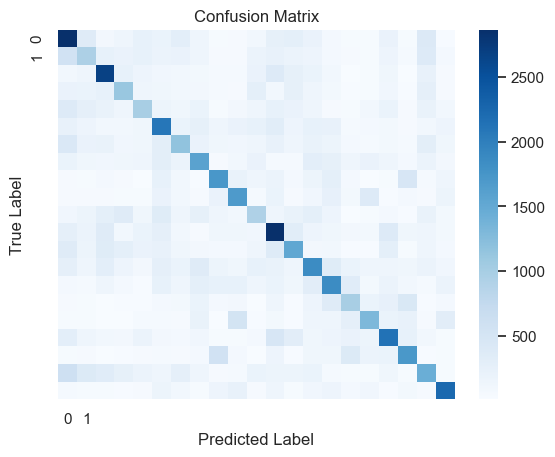

In [46]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_labels, label_pred)
sns.heatmap(cm, annot=None, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()